In [8]:
from tenzing.core.model_implementations.typesets import tenzing_standard
from tenzing.core.typesets import infer_type
from tenzing.core.model_implementations import *
import pandas as pd
import numpy as np
import networkx as nx
import datetime
import itertools

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df = pd.DataFrame({'Integer  Column': [1, 2, 3], 
                   'Float Column': [2.1, 3.5, 4], 
                   'String Column': ['howdy', 'howdy', 'doody'],
                   'Datetime Column': pd.to_datetime([datetime.date(2011,1,1), datetime.date(2012, 1, 1), datetime.date(2013,1,1)]),
                   'Geometry Column': pd.Series(['POINT (12 42)', 'POINT (100 42.723)', 'POINT (0 0)']),
                   'Float as String Column': pd.Series([np.nan, 1.1, 2.1]).astype(str),
                   'bool': [True, False, True],
                   'bool_string': ['True', 'false', 'False']
                   })
df


,Integer Column,Float Column,String Column,Datetime Column,Geometry Column,Float as String Column,bool,bool_string
0,1,2.1,howdy,2011-01-01,POINT (12 42),nan,True,True
1,2,3.5,howdy,2012-01-01,POINT (100 42.723),1.1,False,false
2,3,4.0,doody,2013-01-01,POINT (0 0),2.1,True,False


In [10]:
ts = tenzing_standard()
_ = ts.prep(df)

ts.summary_report(df)

Number of Observations,3
Number of Variables,8
tenzing_integer,1
tenzing_float,1
tenzing_string,4
tenzing_timestamp,1
tenzing_bool,1
nunique,3.0
mean,2.0
std,1.0
max,3.0


In [11]:
ts.column_type_map

{'Integer  Column': tenzing_integer,
 'Float Column': tenzing_float,
 'String Column': tenzing_string,
 'Datetime Column': tenzing_timestamp,
 'Geometry Column': tenzing_string,
 'Float as String Column': tenzing_string,
 'bool': tenzing_bool,
 'bool_string': tenzing_string}

In [12]:
ts.infer_types(df)

{'Integer  Column': tenzing_integer,
 'Float Column': tenzing_float,
 'String Column': tenzing_string,
 'Datetime Column': tenzing_timestamp,
 'Geometry Column': tenzing_geometry,
 'Float as String Column': tenzing_float,
 'bool': tenzing_bool,
 'bool_string': tenzing_bool}

In [13]:
ts.cast_to_inferred_types(df)

,Integer Column,Float Column,String Column,Datetime Column,Geometry Column,Float as String Column,bool,bool_string
0,1,2.1,howdy,2011-01-01,POINT (12 42),NaN,True,True
1,2,3.5,howdy,2012-01-01,POINT (100 42.723),1.1,False,False
2,3,4.0,doody,2013-01-01,POINT (0 0),2.1,True,False


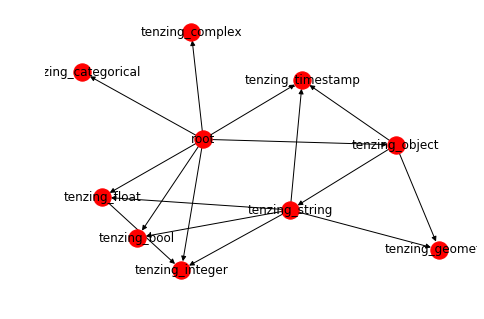

In [14]:
nx.draw_kamada_kawai(ts.relation_map, with_labels=True)